<a href="https://colab.research.google.com/github/shubhaankargupta/ML-Art-Generator/blob/main/ML_GAN_ART.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## GENERATING ML ART

<td>
    <a target="_blank" href="https://github.com/shubhaankargupta/ML-Art-Generator"><img src="https://github.githubassets.com/images/modules/logos_page/GitHub-Mark.png" width="32" height="32"/>View on GitHub</a>
</td>

This colab uses Neural Style Transfer, a very basic method, to generate ML art pieces

**STEPS:**

1) Use the interface below on the right to enter the URL (ending with .png or .jpeg) of both the content image (to modify) and style image (used to modify). 

2) run the cell by clicking on the the 'run' button and get a stylised image.

The model works best on square images, although rectangular ones can also be used.

### SELECT THE IMAGES BY ENTERING THEIR URL AND RUN THE CELL TO GET AN IMAGE

1040384/1027249 [==============================] - 0s 0us/step


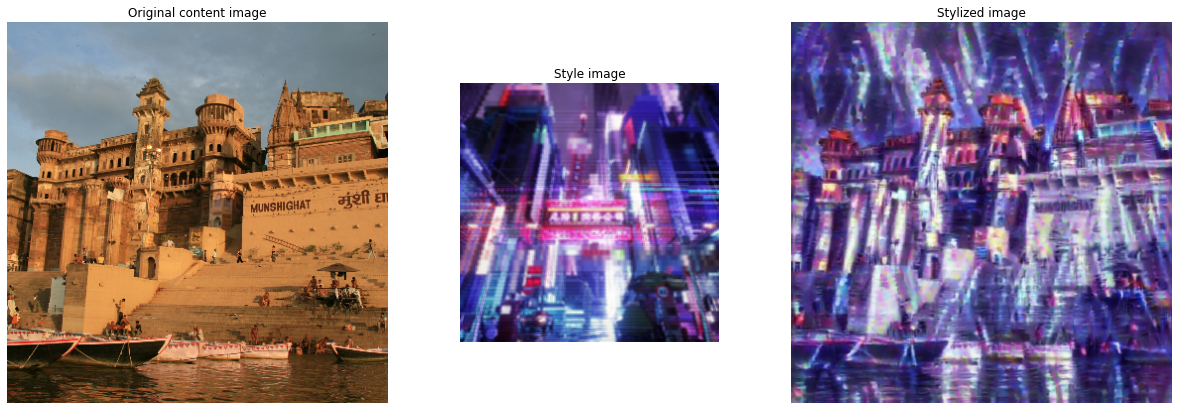

In [1]:
# @title Load example images  { display-mode: "form" }
import functools
import os
from matplotlib import gridspec
import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub


def crop_center(image):

  shape = image.shape
  new_shape = min(shape[1], shape[2])
  offset_y = max(shape[1] - shape[2], 0) // 2
  offset_x = max(shape[2] - shape[1], 0) // 2
  image = tf.image.crop_to_bounding_box(
      image, offset_y, offset_x, new_shape, new_shape)
  return image

@functools.lru_cache(maxsize=None)
def load_image(image_url, image_size=(256, 256), preserve_aspect_ratio=True):
  image_path = tf.keras.utils.get_file(os.path.basename(image_url)[-128:], image_url)
  img = tf.io.decode_image(
      tf.io.read_file(image_path),
      channels=3, dtype=tf.float32)[tf.newaxis, ...]
  img = crop_center(img)
  img = tf.image.resize(img, image_size, preserve_aspect_ratio=True)
  return img

def show_n(images, titles=('',)):
  n = len(images)
  image_sizes = [image.shape[1] for image in images]
  w = (image_sizes[0] * 6) // 320
  plt.figure(figsize=(w * n, w))
  gs = gridspec.GridSpec(1, n, width_ratios=image_sizes)
  for i in range(n):
    plt.subplot(gs[i])
    plt.imshow(images[i][0], aspect='equal')
    plt.axis('off')
    plt.title(titles[i] if len(titles) > i else '')
  plt.show()

content_image_url = 'https://upload.wikimedia.org/wikipedia/commons/e/ef/Munshi_Ghat%2C_Varanasi.jpg'  # @param {type:"string"}
style_image_url = 'https://mir-s3-cdn-cf.behance.net/project_modules/max_1200/e5eada85784627.5d862de5bb2dd.jpg'  # @param {type:"string"}


output_image_size = 384

content_img_size = (output_image_size, output_image_size)
style_img_size = (256, 256)

content_image = load_image(content_image_url, content_img_size)
style_image = load_image(style_image_url, style_img_size)
style_image = tf.nn.avg_pool(style_image, ksize=[3,3], strides=[1,1], padding='SAME')


hub_handle = 'https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2'
hub_module = hub.load(hub_handle)

outputs = hub_module(tf.constant(content_image), tf.constant(style_image))
stylized_image = outputs[0]
show_n([content_image, style_image, stylized_image], titles=['Original content image', 'Style image', 'Stylized image'])